In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
# Chargement du dataset California Housing
df = fetch_california_housing(as_frame=True)

In [3]:
# Séparation des features (X) et de la target (y)
X,y = df.data, df.target

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
# Division des données en sets d'entraînement et de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un pipeline pour la normalisation des données
pipeline_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", RandomForestRegressor(random_state=42))  # Modèle de régression
])

pipeline_dt = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", DecisionTreeRegressor(random_state=42))  # Modèle de régression
])

In [5]:
# Entraînement des modèles

pipeline_rf.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [6]:
# Prédictions sur le set de test
dtm_pred = pipeline_dt.predict(X_test)
rfm_pred = pipeline_rf.predict(X_test)

In [8]:
from sklearn.metrics import mean_absolute_error
# Évaluation des modèles avec différentes métriques
# Erreur absolue moyenne
print("Decision Tree Mean Absolute Error:", round(mean_absolute_error(y_test, dtm_pred), 2))
print("Random Forest Mean Absolute Error:", round(mean_absolute_error(y_test, rfm_pred), 2))

Decision Tree Mean Absolute Error: 0.45
Random Forest Mean Absolute Error: 0.33


In [10]:
import pandas as pd
# Affichage des noms des features
feature_names = df.feature_names
print("Feature Names:", feature_names)
# Affichage des importances des features avec leurs noms triées par ordre décroissant
feature_importances_dt = pd.Series(pipeline_dt.named_steps['regressor'].feature_importances_, index=feature_names).sort_values(ascending=False)
feature_importances_rf = pd.Series(pipeline_rf.named_steps['regressor'].feature_importances_, index=feature_names).sort_values(ascending=False)
print("Decision Tree Feature Importances with Names:\n", feature_importances_dt)
print("Random Forest Feature Importances with Names:\n", feature_importances_rf)


Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Decision Tree Feature Importances with Names:
 MedInc        0.528509
AveOccup      0.130838
Latitude      0.093717
Longitude     0.082902
AveRooms      0.052975
HouseAge      0.051884
Population    0.030516
AveBedrms     0.028660
dtype: float64
Random Forest Feature Importances with Names:
 MedInc        0.524871
AveOccup      0.138443
Latitude      0.088936
Longitude     0.088629
HouseAge      0.054593
AveRooms      0.044272
Population    0.030650
AveBedrms     0.029606
dtype: float64


In [13]:
# Score R2 (coefficient de détermination)
from sklearn.metrics import r2_score


print("Decision Tree R2 Score:", round(r2_score(y_test, dtm_pred), 2))
print("Random Forest R2 Score:", round(r2_score(y_test, rfm_pred), 2))

Decision Tree R2 Score: 0.62
Random Forest R2 Score: 0.81


In [14]:
from sklearn.metrics import mean_absolute_percentage_error
# Erreur absolue moyenne en pourcentage
print("Decision Tree Mean Absolute Percentage Error:", round(mean_absolute_percentage_error(y_test, dtm_pred), 2))
print("Random Forest Mean Absolute Percentage Error:", round(mean_absolute_percentage_error(y_test, rfm_pred), 2))

Decision Tree Mean Absolute Percentage Error: 0.25
Random Forest Mean Absolute Percentage Error: 0.19


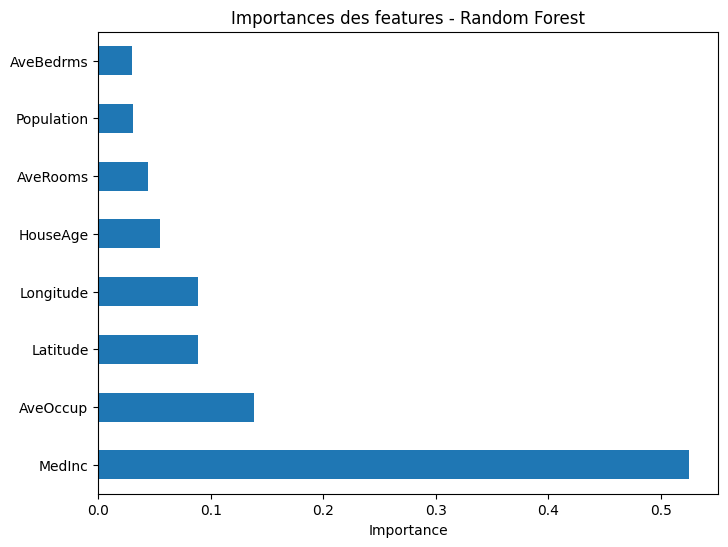

In [15]:
import matplotlib.pyplot as plt

feature_importances_rf.plot(kind='barh', figsize=(8,6))
plt.title("Importances des features - Random Forest")
plt.xlabel("Importance")
plt.show()